In [1]:
from seaborn import scatterplot

from fonte_dados import FonteDados
from preprocessamento import *
from experimentos import *
from treinamento_modelo import TreinamentoModelo
from inferencia_modelo import InferenciaModelo

In [5]:
df = FonteDados().leitura_dados(dados_completos=True)
print(df.shape)
print(df['IN_TREINEIRO'].dtype, df['IN_TREINEIRO'].mean(), df['IN_TREINEIRO'].unique())
del df

Retorno dados completos
(13730, 43)
int64 0.12986161689730516 [0 1]


In [6]:
X_treino, y_treino = FonteDados().leitura_dados()

Retorno treino (X e y)
Dimensão X:  (10984, 42) 
 Dimensão y:  (10984, 1) 



In [7]:
y_treino.head()

,IN_TREINEIRO
NU_INSCRICAO,
937e0c37c6bc90a9d616a0cb0dac7951e46913ea,0
df770f6f4a48b46ea6257274bc19a62201c558ac,0
28197ae2afbe667ca5327ca4013ac73eab5e563c,0
1c7a7d5dc3ca45c3b3c55dd0c0767f22d54006e5,0
5e5a24455ab69e5b0cff230361de0645e107e7ea,1


In [8]:
X_treino.head(5)

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
937e0c37c6bc90a9d616a0cb0dac7951e46913ea,27,AL,20,F,3,1,1,4,1,NaN,...,140.0,540.0,D,E,D,A,B,C,E,A
df770f6f4a48b46ea6257274bc19a62201c558ac,41,PR,17,F,1,1,2,0,2,1.0,...,0.0,0.0,D,E,D,B,B,A,NaN,C
28197ae2afbe667ca5327ca4013ac73eab5e563c,31,MG,47,F,3,1,1,10,1,NaN,...,NaN,NaN,B,C,D,B,A,C,M,A
1c7a7d5dc3ca45c3b3c55dd0c0767f22d54006e5,29,BA,22,M,1,1,2,0,2,1.0,...,100.0,540.0,B,B,B,A,A,A,NaN,A
5e5a24455ab69e5b0cff230361de0645e107e7ea,13,AM,16,F,3,1,3,0,1,NaN,...,60.0,480.0,E,E,D,B,B,A,NaN,A


In [9]:
pre_proc = Preprocessamento()
X_treino_proc = pre_proc.processo(X_treino)

Discretizando colunas
Colunas alteradas: tipo_escola, Q025, sexo, ano_de_conclusao, raça 

Definindo colunas a serem removidas
Variáveis removidas (significância e completude 50.0 %) 

Salvando tipos e nomes das colunas de treino 

Rotulação das categóricas ordinais 

Preenchimento dos missings das numéricas 

Normalização dos dados (robusto) 



# Redução de dimensionalidade

In [7]:
pca = pre_proc.reducao_dim(X_treino_proc)

In [11]:
pca.shape

(10984, 2)

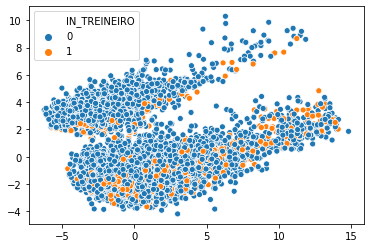

In [12]:
scatterplot(x=pca[:,0], y=pca[:,1], hue=y_treino['IN_TREINEIRO'])

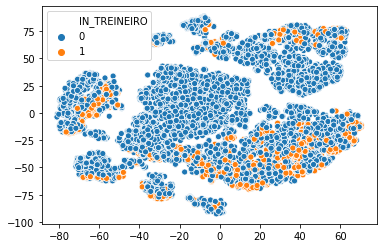

In [13]:
tsne = pre_proc.reducao_dim(X_treino_proc, metodo='tsne')
scatterplot(x=tsne[:,0], y=tsne[:,1], hue=y_treino['IN_TREINEIRO'])

In [10]:
X_treino_proc.shape, y_treino.shape

((10984, 24), (10984, 1))

In [11]:
y_treino

,IN_TREINEIRO
NU_INSCRICAO,
937e0c37c6bc90a9d616a0cb0dac7951e46913ea,0
df770f6f4a48b46ea6257274bc19a62201c558ac,0
28197ae2afbe667ca5327ca4013ac73eab5e563c,0
1c7a7d5dc3ca45c3b3c55dd0c0767f22d54006e5,0
5e5a24455ab69e5b0cff230361de0645e107e7ea,1
...,...
318b5b0174aa7fcabf033d7ba8453b6c6e0221be,0
819dd8f5fac225bc8bda913cf2d548bd4d0e9bcc,0
d9a6f5952e64f945e71212a9345b319315949058,0


In [8]:
X_treinoBalanc, y_treinoBalanc = pre_proc.balanceamento_oversampling(X_treino_proc, y_treino)

Dimensões antes: ((10984, 24), (10984, 1))  |  Dimensões depois: ((19120, 24), (19120,))


In [9]:
y_treinoBalanc.mean()

0.5

In [10]:
y_treino

,IN_TREINEIRO
NU_INSCRICAO,
937e0c37c6bc90a9d616a0cb0dac7951e46913ea,0
df770f6f4a48b46ea6257274bc19a62201c558ac,0
28197ae2afbe667ca5327ca4013ac73eab5e563c,0
1c7a7d5dc3ca45c3b3c55dd0c0767f22d54006e5,0
5e5a24455ab69e5b0cff230361de0645e107e7ea,1
...,...
318b5b0174aa7fcabf033d7ba8453b6c6e0221be,0
819dd8f5fac225bc8bda913cf2d548bd4d0e9bcc,0
d9a6f5952e64f945e71212a9345b319315949058,0


# Experimentos

In [1]:
from experimentos import Experimentos
from treinamento_modelo import TreinamentoModelo
from inferencia_modelo import InferenciaModelo

In [2]:
experim = Experimentos()
modelos = experim.exec_experimentos()

Leitura dos dados 


Retorno treino (X e y)
Dimensão X:  (10984, 42) 
 Dimensão y:  (10984, 1) 

Retorno teste (X e y)
Dimensão X:  (2746, 42) 
 Dimensão y:  (2746, 1) 

Pré-processamento dados de treino 


Discretizando colunas
Colunas alteradas: tipo_escola, Q025, sexo, ano_de_conclusao, raça 

Definindo colunas a serem removidas
Variáveis removidas (significância e completude 50.0 %) 

Salvando tipos e nomes das colunas de treino 

Rotulação das categóricas ordinais 

Preenchimento dos missings das numéricas 

Normalização dos dados (robusto) 

Pré-processamento dados de teste 


Discretizando colunas
Colunas alteradas: tipo_escola, Q025, sexo, ano_de_conclusao, raça 

Variáveis removidas (significância e completude  50.0 %) 

Rotulação das categóricas ordinais 

Preenchimento dos missings das numéricas 

Normalização dos dados (robusto) 

Balanceamento Oversampling 


Dimensões antes: ((10984, 24), (10984, 1))  |  Dimensões depois: ((19120, 24), (19120,))
Treinamento dos modelos
Tr

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Treinando o modelo  knn
KNeighborsClassifier() 


Treinando o modelo  decision_tree
DecisionTreeClassifier() 


Treinando o modelo  random_forest
RandomForestClassifier() 


Treinando o modelo  svm
SVC() 


Treinando o modelo  adaboost
AdaBoostClassifier() 


Treinando o modelo  xgb
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=False, verbosity=None) 


Treinando o modelo  catboost


Learning rate set to 0.036319
0:	learn: 0.6007711

145:	learn: 0.0041747	total: 2.06s	remaining: 12.1s
146:	learn: 0.0041643	total: 2.08s	remaining: 12.1s
147:	learn: 0.0041513	total: 2.09s	remaining: 12s
148:	learn: 0.0041404	total: 2.1s	remaining: 12s
149:	learn: 0.0041218	total: 2.12s	remaining: 12s
150:	learn: 0.0041123	total: 2.13s	remaining: 12s
151:	learn: 0.0040991	total: 2.14s	remaining: 12s
152:	learn: 0.0040768	total: 2.16s	remaining: 11.9s
153:	learn: 0.0040593	total: 2.17s	remaining: 11.9s
154:	learn: 0.0040593	total: 2.18s	remaining: 11.9s
155:	learn: 0.0040454	total: 2.19s	remaining: 11.9s
156:	learn: 0.0040066	total: 2.2s	remaining: 11.8s
157:	learn: 0.0039882	total: 2.22s	remaining: 11.8s
158:	learn: 0.0039751	total: 2.23s	remaining: 11.8s
159:	learn: 0.0039544	total: 2.25s	remaining: 11.8s
160:	learn: 0.0039448	total: 2.26s	remaining: 11.8s
161:	learn: 0.0039297	total: 2.27s	remaining: 11.8s
162:	learn: 0.0039235	total: 2.28s	remaining: 11.7s
163:	learn: 0.0039037	total: 2.3s	remaining: 11.7s
164:	learn: 0.0038880	tot

318:	learn: 0.0025782	total: 4.03s	remaining: 8.61s
319:	learn: 0.0025782	total: 4.04s	remaining: 8.59s
320:	learn: 0.0025717	total: 4.05s	remaining: 8.57s
321:	learn: 0.0025717	total: 4.06s	remaining: 8.55s
322:	learn: 0.0025717	total: 4.07s	remaining: 8.53s
323:	learn: 0.0025590	total: 4.08s	remaining: 8.52s
324:	learn: 0.0025452	total: 4.09s	remaining: 8.51s
325:	learn: 0.0025452	total: 4.1s	remaining: 8.48s
326:	learn: 0.0025327	total: 4.12s	remaining: 8.47s
327:	learn: 0.0025327	total: 4.13s	remaining: 8.45s
328:	learn: 0.0025196	total: 4.14s	remaining: 8.44s
329:	learn: 0.0025146	total: 4.15s	remaining: 8.42s
330:	learn: 0.0025146	total: 4.16s	remaining: 8.4s
331:	learn: 0.0025146	total: 4.17s	remaining: 8.38s
332:	learn: 0.0025146	total: 4.18s	remaining: 8.37s
333:	learn: 0.0025146	total: 4.18s	remaining: 8.34s
334:	learn: 0.0025146	total: 4.19s	remaining: 8.32s
335:	learn: 0.0025146	total: 4.21s	remaining: 8.31s
336:	learn: 0.0025094	total: 4.21s	remaining: 8.29s
337:	learn: 0.

493:	learn: 0.0024703	total: 5.63s	remaining: 5.76s
494:	learn: 0.0024703	total: 5.63s	remaining: 5.75s
495:	learn: 0.0024703	total: 5.64s	remaining: 5.74s
496:	learn: 0.0024703	total: 5.65s	remaining: 5.72s
497:	learn: 0.0024703	total: 5.66s	remaining: 5.71s
498:	learn: 0.0024703	total: 5.67s	remaining: 5.69s
499:	learn: 0.0024703	total: 5.68s	remaining: 5.68s
500:	learn: 0.0024703	total: 5.69s	remaining: 5.67s
501:	learn: 0.0024703	total: 5.7s	remaining: 5.65s
502:	learn: 0.0024703	total: 5.71s	remaining: 5.64s
503:	learn: 0.0024703	total: 5.72s	remaining: 5.63s
504:	learn: 0.0024703	total: 5.72s	remaining: 5.61s
505:	learn: 0.0024703	total: 5.73s	remaining: 5.6s
506:	learn: 0.0024703	total: 5.74s	remaining: 5.58s
507:	learn: 0.0024703	total: 5.75s	remaining: 5.57s
508:	learn: 0.0024703	total: 5.76s	remaining: 5.56s
509:	learn: 0.0024703	total: 5.77s	remaining: 5.54s
510:	learn: 0.0024703	total: 5.78s	remaining: 5.53s
511:	learn: 0.0024703	total: 5.79s	remaining: 5.52s
512:	learn: 0.

670:	learn: 0.0024698	total: 7.21s	remaining: 3.54s
671:	learn: 0.0024698	total: 7.22s	remaining: 3.53s
672:	learn: 0.0024698	total: 7.23s	remaining: 3.51s
673:	learn: 0.0024698	total: 7.24s	remaining: 3.5s
674:	learn: 0.0024698	total: 7.25s	remaining: 3.49s
675:	learn: 0.0024698	total: 7.26s	remaining: 3.48s
676:	learn: 0.0024698	total: 7.27s	remaining: 3.47s
677:	learn: 0.0024698	total: 7.28s	remaining: 3.46s
678:	learn: 0.0024698	total: 7.29s	remaining: 3.44s
679:	learn: 0.0024698	total: 7.29s	remaining: 3.43s
680:	learn: 0.0024698	total: 7.3s	remaining: 3.42s
681:	learn: 0.0024698	total: 7.31s	remaining: 3.41s
682:	learn: 0.0024698	total: 7.32s	remaining: 3.4s
683:	learn: 0.0024698	total: 7.33s	remaining: 3.39s
684:	learn: 0.0024698	total: 7.34s	remaining: 3.38s
685:	learn: 0.0024698	total: 7.35s	remaining: 3.37s
686:	learn: 0.0024698	total: 7.36s	remaining: 3.35s
687:	learn: 0.0024698	total: 7.37s	remaining: 3.34s
688:	learn: 0.0024698	total: 7.38s	remaining: 3.33s
689:	learn: 0.0

845:	learn: 0.0024693	total: 8.81s	remaining: 1.6s
846:	learn: 0.0024693	total: 8.82s	remaining: 1.59s
847:	learn: 0.0024693	total: 8.83s	remaining: 1.58s
848:	learn: 0.0024693	total: 8.84s	remaining: 1.57s
849:	learn: 0.0024693	total: 8.85s	remaining: 1.56s
850:	learn: 0.0024693	total: 8.85s	remaining: 1.55s
851:	learn: 0.0024692	total: 8.86s	remaining: 1.54s
852:	learn: 0.0024692	total: 8.87s	remaining: 1.53s
853:	learn: 0.0024692	total: 8.88s	remaining: 1.52s
854:	learn: 0.0024692	total: 8.89s	remaining: 1.51s
855:	learn: 0.0024692	total: 8.89s	remaining: 1.5s
856:	learn: 0.0024692	total: 8.9s	remaining: 1.49s
857:	learn: 0.0024692	total: 8.91s	remaining: 1.47s
858:	learn: 0.0024692	total: 8.92s	remaining: 1.46s
859:	learn: 0.0024692	total: 8.93s	remaining: 1.45s
860:	learn: 0.0024692	total: 8.93s	remaining: 1.44s
861:	learn: 0.0024692	total: 8.94s	remaining: 1.43s
862:	learn: 0.0024692	total: 8.95s	remaining: 1.42s
863:	learn: 0.0024692	total: 8.96s	remaining: 1.41s
864:	learn: 0.0

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2387
           1       0.60      0.94      0.73       359

    accuracy                           0.91      2746
   macro avg       0.80      0.92      0.84      2746
weighted avg       0.94      0.91      0.92      2746
 


Matriz de confusão 
 [[2164  223]
 [  23  336]] 


Métrica f1: 0.732 



 decision_tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2387
           1       0.98      0.98      0.98       359

    accuracy                           0.99      2746
   macro avg       0.99      0.99      0.99      2746
weighted avg       0.99      0.99      0.99      2746
 


Matriz de confusão 
 [[2380    7]
 [   8  351]] 


Métrica f1: 0.979 



 random_forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2387
           1       0.99      0.98      0.99       359



# Preparando modelo final

In [3]:
modelo = TreinamentoModelo().treinamento_modelo()

Carregamento dos dados 


Retorno treino (X e y)
Dimensão X:  (10984, 42) 
 Dimensão y:  (10984, 1) 

Treinamento do pré-processamento 


Discretizando colunas
Colunas alteradas: tipo_escola, Q025, sexo, ano_de_conclusao, raça 

Definindo colunas a serem removidas
Variáveis removidas (significância e completude 50.0 %) 

Salvando tipos e nomes das colunas de treino 

Rotulação das categóricas ordinais 

Preenchimento dos missings das numéricas 

Normalização dos dados (robusto) 

Balanceamento Oversampling 


Dimensões antes: ((10984, 24), (10984, 1))  |  Dimensões depois: ((19120, 24), (19120,))
Treinamento do modelo 


{'model_obj': XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
    

# Inferência (submissão do teste)

In [2]:
inferencia = InferenciaModelo()
y_pred = inferencia.predicao()

Carregando o modelo 


Carregando dados 


Retorno dados de submissão
Dimensão:  (4570, 42) 

Pré-processamento 


Discretizando colunas
Colunas alteradas: tipo_escola, Q025, sexo, ano_de_conclusao, raça 

Variáveis removidas (significância e completude  50.0 %) 

Rotulação das categóricas ordinais 

Preenchimento dos missings das numéricas 

Normalização dos dados (robusto) 

Predição 


Salvando arquivos 




In [7]:
inferencia.predito

,0
0,0
1,0
2,1
3,0
4,0
...,...
4565,0
4566,0
4567,0
4568,0


In [6]:
inferencia.modelo

{'model_obj': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'preprocess': <preprocessamento.Preprocessamento at 0x1f8a49f0bc8>,
 'colunas':               colunas    tipos
 0            NU_IDADE    int64
 1             TP_SEXO    int64
 2         TP_COR_RACA    int64
 3     TP_ST_CONCLUSAO    int64
 4     TP_ANO_CONCLUIU    int64
 5           TP_ESCOLA    int64
 6          NU_NOTA_CN  float64
 7          NU_NOTA_CH  float64
 8          NU_NOTA_LC  float64
 9           TP_LINGUA    int64
 10  TP_STATUS_REDACAO  float64
 11      NU_NOTA_C

In [7]:
#sub = inferencia.predito
y_pred.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,430.096
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,436.071
2,b38a03232f43b11c9d0788abaf060f7366053b6d,579.142
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,581.408


In [8]:
inferencia.dados_prever.head()

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,...,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,0.500000,0.0,0.0,-1.0,2.0,0.0,0.251765,-0.268063,-0.099508,-1.0,...,0.000000,-0.2,-0.103448,1,0,2,0,-1.0,2,0
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1.166667,0.0,0.0,-1.0,2.0,0.0,-0.342949,-0.041424,0.112265,0.0,...,0.166667,0.4,0.172414,4,1,2,1,0.0,1,0
b38a03232f43b11c9d0788abaf060f7366053b6d,0.333333,-1.0,-1.0,0.0,0.0,0.0,1.309663,0.585168,0.231821,-1.0,...,-0.166667,0.2,-0.275862,4,4,3,1,0.0,0,0
70b682d9a3636be23f6120fa9d6b164eb3c6002d,1.333333,0.0,0.0,-1.0,2.0,0.0,-3.498890,-2.379717,-0.886459,-1.0,...,-0.833333,-0.6,-0.827586,7,4,6,1,0.0,0,0
715494628a50142ce8cb17191cfe6d0f3cae0934,-0.166667,-1.0,-1.0,0.0,0.0,0.0,1.285455,-0.034282,0.154912,0.0,...,-0.166667,-0.6,-0.275862,3,7,7,2,0.0,0,0


In [9]:
inferencia.dados_prever.index.tolist()

['73ff9fcc02f0a99919906c942c2e1a1042cdcf98',
 '71a95f9f1b91a82c65ad94abbdf9f54e6066f968',
 'b38a03232f43b11c9d0788abaf060f7366053b6d',
 '70b682d9a3636be23f6120fa9d6b164eb3c6002d',
 '715494628a50142ce8cb17191cfe6d0f3cae0934',
 'e656d6bad65c93fb2880f1eba5037008c8e75774',
 '465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13',
 '11539e86171bf07d3a36f09377d7f54ebcc8406a',
 '043c544a2104aa8a9849f1a703a08d37a2f16839',
 '76ba050e64ad100b856f0eaabd8f539d5c7dd185',
 '8b7c167ea7b55c8168ec60c3851b1b598a8fbd11',
 'db4da599aab5bb08dce27094a35fd3e36cd0abce',
 '940aede382ccb332fab15d413217695ec44ca765',
 '9ad714b116da76d878dd399d187fccc2dd13dd63',
 'dd34464a4d780b12a089347ad580418ac57a3055',
 'f837a4cb05a5fd59d20138182f5e8c721eadd584',
 'fbfa8cde21a692b51fb86342110b4a334a0fcfdb',
 'ca8477c8493b09f34d17bb287f9bacf2dd744c32',
 '8b0c675d7fde14953668269d378c588f0df0498b',
 '051c4f04fcbe385e1b3964aeb87f0a41d7f203d0',
 '3d203727f27abd83b71732d88d8cb1cc099f363b',
 'd30d31c8ff45094e9a992c63d4a6f68b245a341a',
 'c0c6a803